<a href="https://www.kaggle.com/code/sharonlogier/student-performance-dataset?scriptVersionId=224447850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

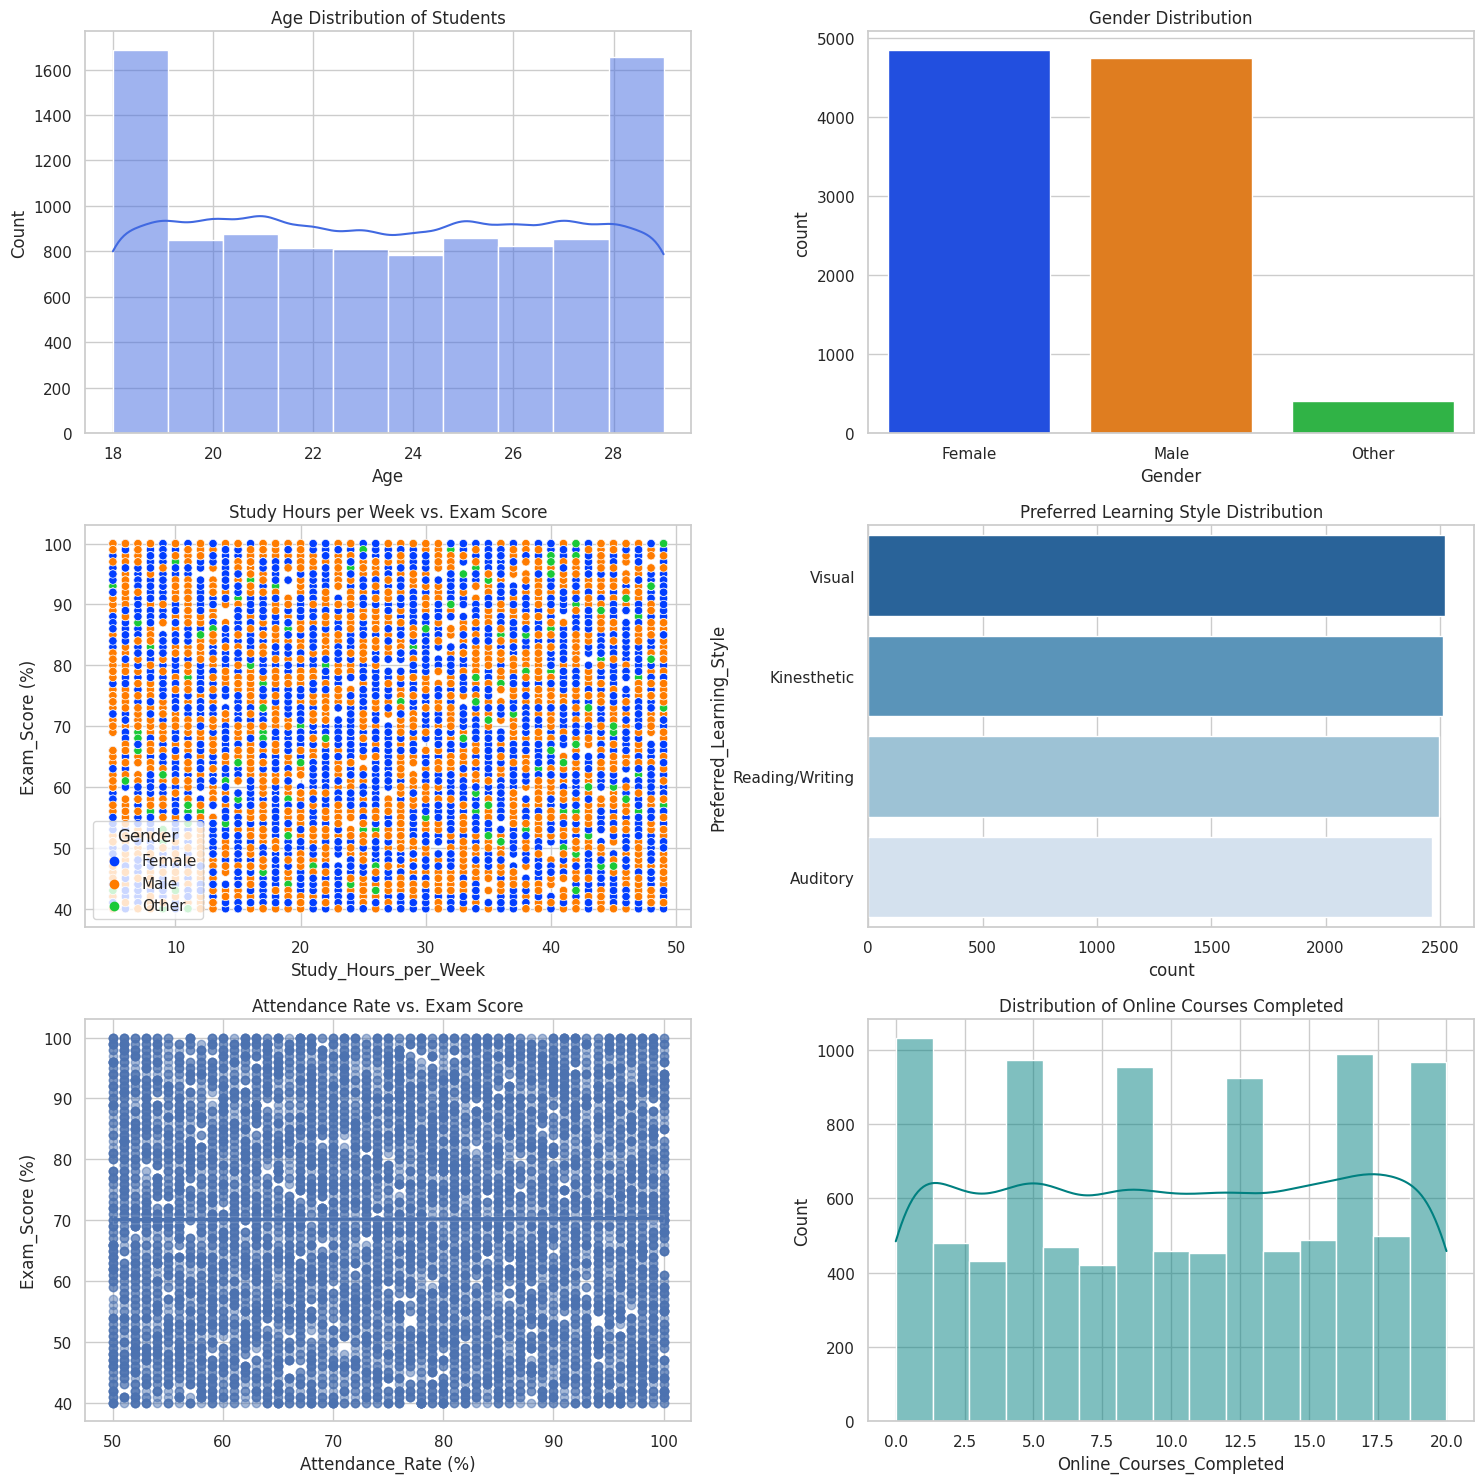

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Replace 'your_file.csv' with the correct filename)
df = pd.read_csv("/kaggle/input/student-performance-and-learning-style/student_performance_large_dataset.csv") 

warnings.simplefilter(action="ignore", category=FutureWarning)

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Create a figure for multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Age distribution
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0], color="royalblue")
axes[0, 0].set_title("Age Distribution of Students")

# Gender distribution
sns.countplot(x=df['Gender'], palette="bright", ax=axes[0, 1])
axes[0, 1].set_title("Gender Distribution")

# Study Hours per Week vs. Exam Score
sns.scatterplot(x=df['Study_Hours_per_Week'], y=df['Exam_Score (%)'], hue=df['Gender'], palette="bright", ax=axes[1, 0])
axes[1, 0].set_title("Study Hours per Week vs. Exam Score")

# Preferred Learning Style Distribution
sns.countplot(y=df['Preferred_Learning_Style'], palette="Blues_r", order=df['Preferred_Learning_Style'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title("Preferred Learning Style Distribution")

# Attendance Rate vs. Exam Score
sns.regplot(x=df['Attendance_Rate (%)'], y=df['Exam_Score (%)'], scatter_kws={'alpha':0.5}, ax=axes[2, 0])
axes[2, 0].set_title("Attendance Rate vs. Exam Score")

# Online Courses Completed Distribution
sns.histplot(df['Online_Courses_Completed'], bins=15, kde=True, color="teal", ax=axes[2, 1])
axes[2, 1].set_title("Distribution of Online Courses Completed")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


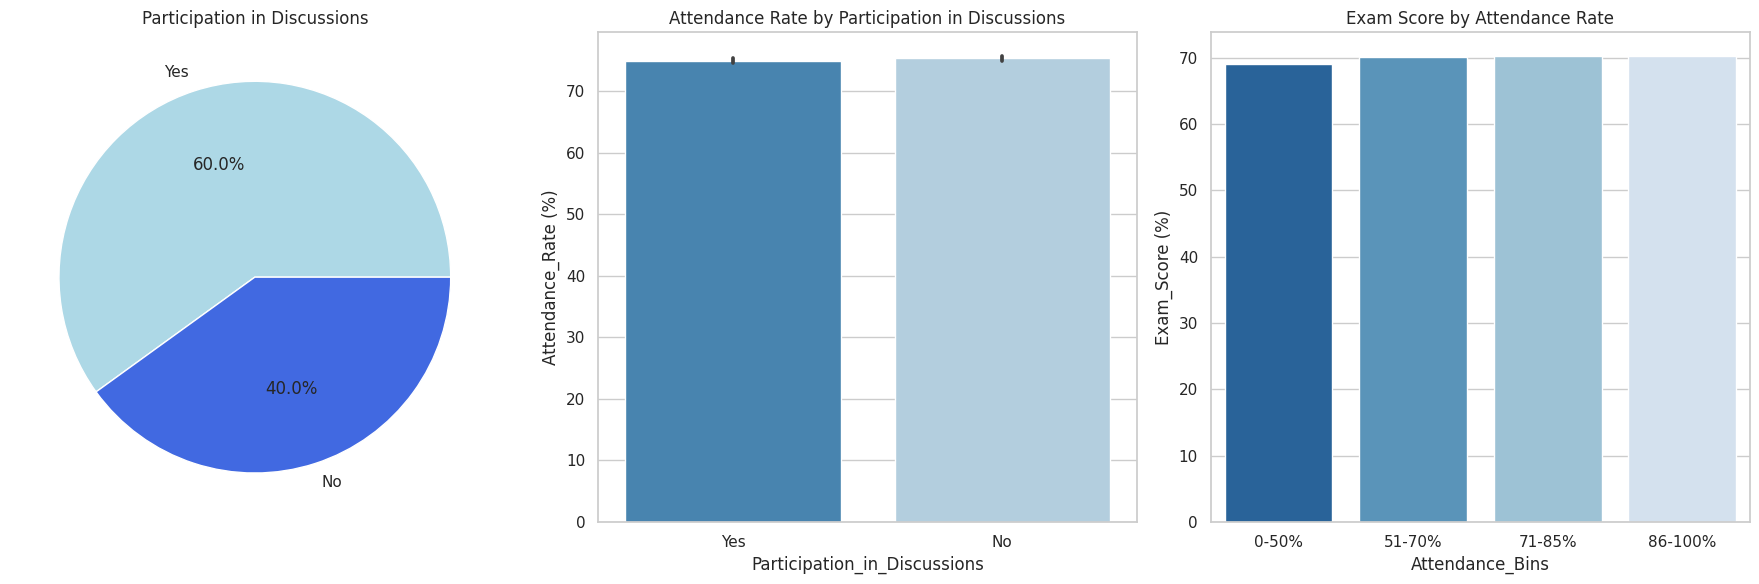

In [2]:
# Create a figure for the three visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie Chart: Participation in Discussions
participation_counts = df['Participation_in_Discussions'].value_counts()
axes[0].pie(participation_counts, labels=participation_counts.index, autopct='%1.1f%%', colors=['lightblue', 'royalblue'])
axes[0].set_title("Participation in Discussions")

# Column Chart: Attendance Rate by Participation in Discussions
sns.barplot(x=df['Participation_in_Discussions'], y=df['Attendance_Rate (%)'], palette="Blues_r", ax=axes[1])
axes[1].set_title("Attendance Rate by Participation in Discussions")

# Column Chart: Attendance Rate vs. Exam Score (Grouped by Attendance Bins)
df['Attendance_Bins'] = pd.cut(df['Attendance_Rate (%)'], bins=[0, 50, 70, 85, 100], labels=['0-50%', '51-70%', '71-85%', '86-100%'])
attendance_exam_avg = df.groupby('Attendance_Bins')['Exam_Score (%)'].mean().reset_index()
sns.barplot(x='Attendance_Bins', y='Exam_Score (%)', data=attendance_exam_avg, palette="Blues_r", ax=axes[2])
axes[2].set_title("Exam Score by Attendance Rate")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
